<a href="https://colab.research.google.com/github/deepak-km-yadav/col_pam/blob/forecasting_assignment/forecasting_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Explain benifits of a forecasting.

1.   Try 4 Models, AutoARIMA, exponentianl Smoothing, SARIMA, SARIMAX and prophet.
2.   Create an weighted Ensemble  with best methods.








Create a elastic coefficient with CPI.

1.   List item
2.   List item



Give the forecast. plus relation with CPI

explain economic factors that could be responsible.

what could be done to Improve Sales.



In [74]:
#/content/TB_Raw_Data.csv
!pip install pmdarima
#!pip install fbprophet

In [75]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
#from fbprophet import Prophet
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima
from statsmodels.tsa.holtwinters import ExponentialSmoothing


In [76]:
# prompt: ignore warning

import warnings
warnings.filterwarnings('ignore')


In [77]:
import io, os, sys, setuptools, tokenize
!pip install prophet
import prophet

In [78]:
df = pd.read_csv('/content/TB_Raw_Data.csv')
df.head()

,Year,Month,Total ToothBrush Pieces Sold
0,2021,1,105020
1,2021,2,101450
2,2021,3,102355
3,2021,4,101775
4,2021,5,100135


In [79]:
# Combine year and month to create a datetime column with the first day of the month
df['date'] = pd.to_datetime(df[['Year', 'Month']].assign(day=1))
df = df.rename(columns={'Total ToothBrush Pieces Sold': 'Sales'})

# Adjust to the last day of the month
df['date'] = df['date'] + pd.offsets.MonthEnd(0)
# Drop the 'year' and 'month' columns
df.drop(['Year', 'Month'], axis=1, inplace=True)
# Sort the DataFrame by the 'date' column
df = df.sort_values(by='date')

# Print max and min date
max_date = df['date'].max()
min_date = df['date'].min()

print(f"Max Date: {max_date}")
print(f"Min Date: {min_date}")
print(f"\nTotal Datapoints: {len(df)}")


df.head()
# elasticity with CPI

Max Date: 2023-12-31 00:00:00
Min Date: 2021-01-31 00:00:00

Total Datapoints: 36


,Sales,date
0,105020,2021-01-31
1,101450,2021-02-28
2,102355,2021-03-31
3,101775,2021-04-30
4,100135,2021-05-31


In [80]:
import pandas as pd
import plotly.express as px

# Plotting the interactive time series plot
fig = px.line(df, x='date', y='Sales', title='Total ToothBrush Pieces Sold Over Time', labels={'Total ToothBrush Pieces Sold': 'Total ToothBrush Pieces Sold', 'date': 'Date'})
fig.update_traces(mode='lines+markers')
fig.update_layout(xaxis_title='Date', yaxis_title='Total ToothBrush Pieces Sold')

# Show the plot
fig.show()

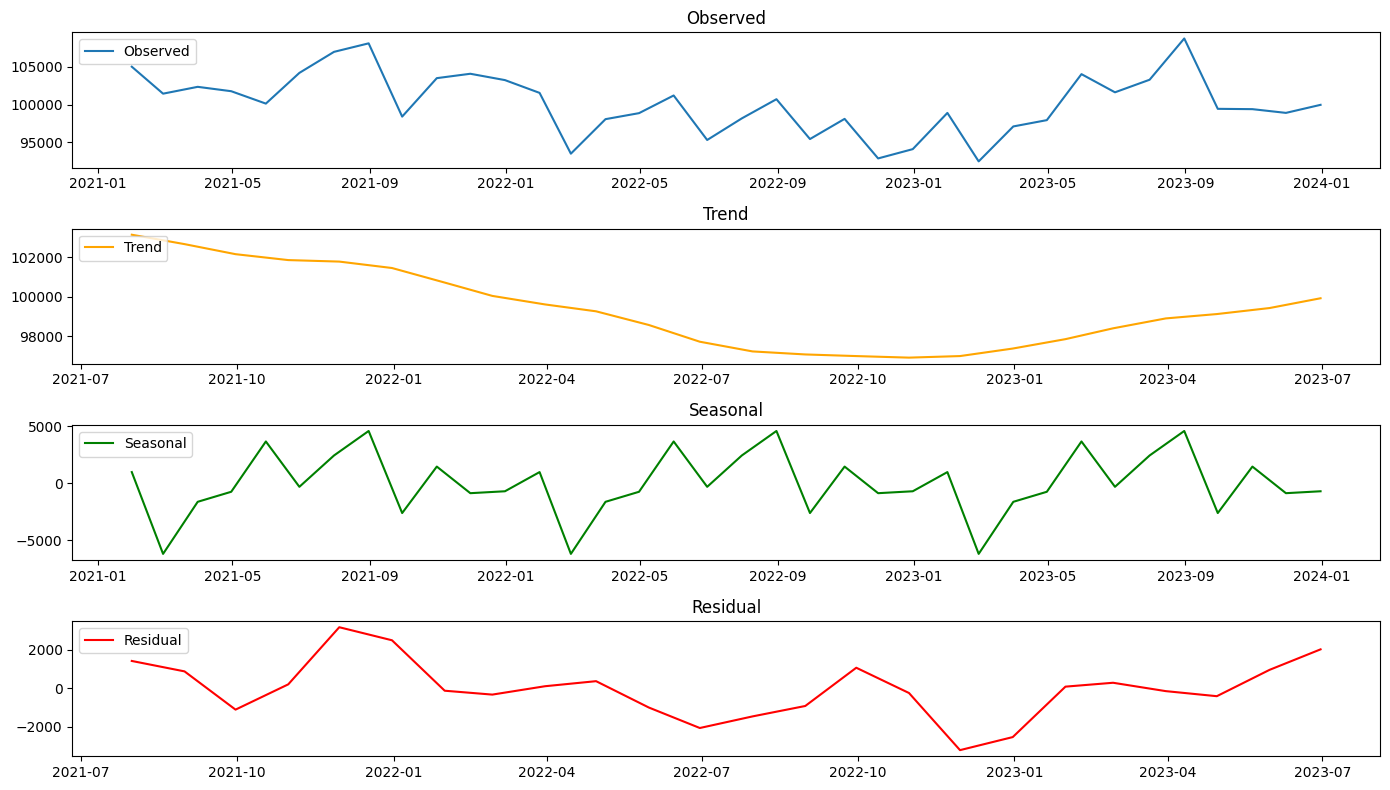

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming your DataFrame is named df and has columns 'date' and 'Sales'
# Convert 'date' column to datetime if it's not already, and set it as the index
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Decompose the time series (assuming a monthly frequency)
result = seasonal_decompose(df['Sales'], model='additive', period=12)

# Plotting the components
plt.figure(figsize=(14, 8))

plt.subplot(411)
plt.plot(result.observed, label='Observed')
plt.legend(loc='upper left')
plt.title('Observed')

plt.subplot(412)
plt.plot(result.trend, label='Trend', color='orange')
plt.legend(loc='upper left')
plt.title('Trend')

plt.subplot(413)
plt.plot(result.seasonal, label='Seasonal', color='green')
plt.legend(loc='upper left')
plt.title('Seasonal')

plt.subplot(414)
plt.plot(result.resid, label='Residual', color='red')
plt.legend(loc='upper left')
plt.title('Residual')

plt.tight_layout()
plt.show()


In [82]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Assuming your DataFrame is named df and has a 'Sales' column
# Ensure that 'Sales' is a time series
series = df['Sales']

# Perform the Augmented Dickey-Fuller test
adf_result = adfuller(series)

# Extract the test statistic and the p-value
test_statistic = adf_result[0]
p_value = adf_result[1]

# Print the results
print('ADF Statistic:', test_statistic)
print('p-value:', p_value)
for key, value in adf_result[4].items():
    print(f'Critical Value {key}: {value}')

# Conclusion based on p-value
if p_value < 0.05:
    print("The time series is stationary (reject H0)")
else:
    print("The time series is non-stationary (fail to reject H0)")


ADF Statistic: -3.6824926468368036
p-value: 0.004366259577150215
Critical Value 1%: -3.6327426647230316
Critical Value 5%: -2.9485102040816327
Critical Value 10%: -2.6130173469387756
The time series is stationary (reject H0)


ARMA Model

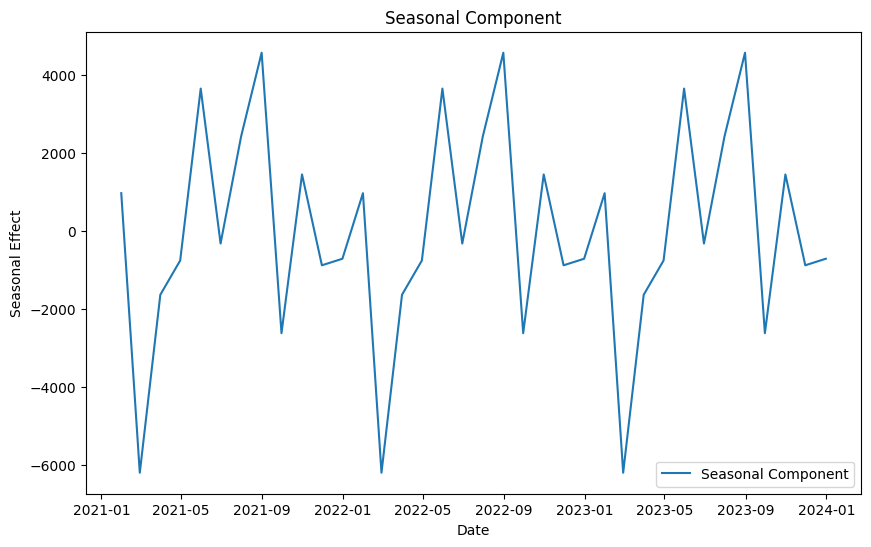

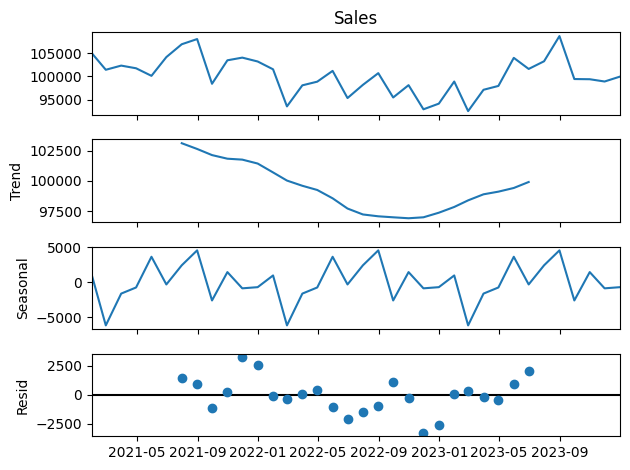

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming your DataFrame is named df and has columns 'date' and 'Sales'
# Convert 'date' column to datetime if it's not already, and set it as the index
#df['date'] = pd.to_datetime(df['date'])
#df.set_index('date', inplace=True)

# Set the frequency to monthly ('M') if not already set
df = df.asfreq('M')

# Decompose the time series using seasonal_decompose
# For monthly data with yearly seasonality, period is set to 12
result = seasonal_decompose(df['Sales'], model='additive', period=12)

# Plot the seasonal component
plt.figure(figsize=(10, 6))
plt.plot(result.seasonal, label='Seasonal Component')
plt.title('Seasonal Component')
plt.xlabel('Date')
plt.ylabel('Seasonal Effect')
plt.legend()
plt.show()

# Plotting all components together
result.plot()
plt.show()


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6ctoplgv/k91h83sw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6ctoplgv/mno7hxs8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51443', 'data', 'file=/tmp/tmp6ctoplgv/k91h83sw.json', 'init=/tmp/tmp6ctoplgv/mno7hxs8.json', 'output', 'file=/tmp/tmp6ctoplgv/prophet_model4ejlq6lg/prophet_model-20240728080713.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
08:07:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:07:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


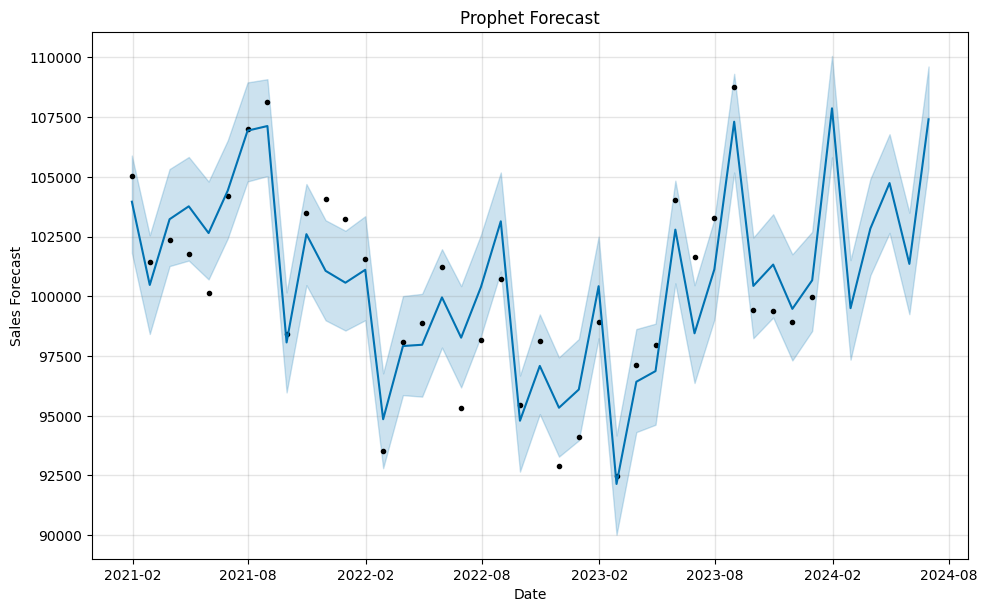

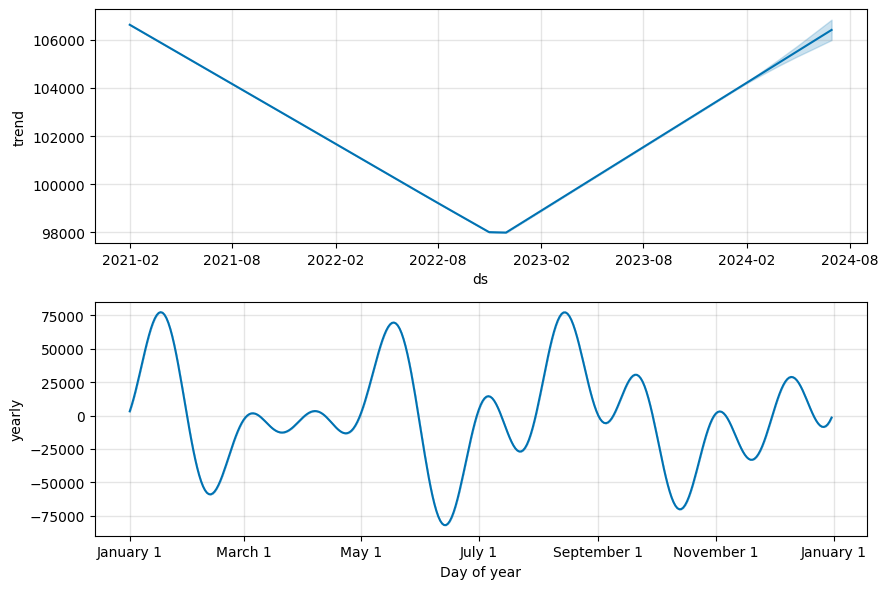

In [84]:
# prompt: write a code for prophet forcasting
# Prophet Code for Modeling

import matplotlib.pyplot as plt
# Prophet Model
# Assuming your DataFrame is named df and has columns 'date' and 'Sales'
df_prophet = df.reset_index().rename(columns={'date': 'ds', 'Sales': 'y'})

# Create and fit the Prophet model
model = prophet.Prophet()
model.fit(df_prophet)

# Create a future DataFrame for predictions (e.g., for the next 12 months)
future = model.make_future_dataframe(periods=6, freq='M')

# Make predictions
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)
plt.title('Prophet Forecast')
plt.xlabel('Date')
plt.ylabel('Sales Forecast')
plt.show()

# Display the forecast components (trend, seasonality, etc.)
fig2 = model.plot_components(forecast)
plt.show()


In [85]:

from prophet import Prophet


# Set the frequency to monthly
df = df.asfreq('M')

# Split the data into train and test sets
train = df.iloc[:-6]  # first 30 months
test = df.iloc[-6:]   # last 6 months

# Function to calculate RMSE and MAPE
def calculate_metrics(true_values, predictions):
    rmse = np.sqrt(mean_squared_error(true_values, predictions))
    mape = mean_absolute_percentage_error(true_values, predictions) * 100
    return rmse, mape

# Auto ARIMA
auto_arima_model = auto_arima(train['Sales'], seasonal=False, stepwise=True)
auto_arima_forecast = auto_arima_model.predict(n_periods=6)
auto_arima_rmse, auto_arima_mape = calculate_metrics(test['Sales'], auto_arima_forecast)

# SARIMA
sarima_model = SARIMAX(train['Sales'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_model_fit = sarima_model.fit(disp=False)
sarima_forecast = sarima_model_fit.forecast(steps=6)
sarima_rmse, sarima_mape = calculate_metrics(test['Sales'], sarima_forecast)

# ETS (Exponential Smoothing)
ets_model = ExponentialSmoothing(train['Sales'], trend='add', seasonal='add', seasonal_periods=12)
ets_model_fit = ets_model.fit()
ets_forecast = ets_model_fit.forecast(steps=6)
ets_rmse, ets_mape = calculate_metrics(test['Sales'], ets_forecast)

# Prophet
prophet_df = train.reset_index().rename(columns={'date': 'ds', 'Sales': 'y'})
prophet_model = Prophet()
prophet_model.fit(prophet_df)
future = prophet_model.make_future_dataframe(periods=6, freq='M')
forecast = prophet_model.predict(future)
prophet_forecast = forecast.iloc[-6:]['yhat'].values
prophet_rmse, prophet_mape = calculate_metrics(test['Sales'], prophet_forecast)

# Print results
print(f'Auto ARIMA RMSE: {auto_arima_rmse:.2f}, MAPE: {auto_arima_mape:.2f}%')
print(f'SARIMA RMSE: {sarima_rmse:.2f}, MAPE: {sarima_mape:.2f}%')
print(f'ETS RMSE: {ets_rmse:.2f}, MAPE: {ets_mape:.2f}%')
print(f'Prophet RMSE: {prophet_rmse:.2f}, MAPE: {prophet_mape:.2f}%')

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 23.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6ctoplgv/6hc_kiij.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6ctoplgv/nhpdu6ka.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25627', 'data', 'file=/tmp/tmp6ctoplgv/6hc_kiij.json', 'init=/tmp/tmp6ctoplgv/nhpdu6ka.json', 'output', 'file=/tmp/tmp6ctoplgv/prophet_modelv1i_cibx/prophet_model-20240728080723.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
08:07:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:07:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:

Auto ARIMA RMSE: 3498.12, MAPE: 2.84%
SARIMA RMSE: 2324.31, MAPE: 1.88%
ETS RMSE: 3640.28, MAPE: 3.02%
Prophet RMSE: 8140.71, MAPE: 6.85%


In [100]:
import itertools
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pandas as pd

# Assuming df['Sales'] contains the time series data
y = df['Sales']

# Define the p, d, q ranges for non-seasonal and seasonal components
p = d = q = range(0, 3)
seasonal_p = seasonal_d = seasonal_q = range(0, 2)
seasonal_period = 12  # e.g., monthly data with yearly seasonality

# Generate all combinations of p, d, q, P, D, Q
pdq = list(itertools.product(p, d, q))
seasonal_pdq = list(itertools.product(seasonal_p, seasonal_d, seasonal_q))

best_aic = float("inf")
best_order = None
best_seasonal_order = None

for param in pdq:
    for seasonal_param in seasonal_pdq:
        try:
            model = SARIMAX(y, order=param, seasonal_order=seasonal_param + (seasonal_period,))
            results = model.fit(disp=False)
            if results.aic < best_aic:
                best_aic = results.aic
                best_order = param
                best_seasonal_order = seasonal_param
        except:
            continue

print(f'Best SARIMA{best_order}x{best_seasonal_order + (seasonal_period,)} - AIC:{best_aic}')


Best SARIMA(2, 1, 2)x(0, 1, 1, 12) - AIC:440.14658466335504


In [101]:
#Best SARIMA(2, 1, 2)x(0, 1, 1, 12) - AIC:440.14658466335504

# SARIMA
sarima_model = SARIMAX(train['Sales'], order=(2, 1, 2), seasonal_order=(0, 1, 1, 12))
sarima_model_fit = sarima_model.fit(disp=False)
sarima_forecast = sarima_model_fit.forecast(steps=6)
sarima_rmse, sarima_mape = calculate_metrics(test['Sales'], sarima_forecast)

print(f'SARIMA RMSE: {sarima_rmse:.2f}, MAPE: {sarima_mape:.2f}%')




SARIMA RMSE: 3468.99, MAPE: 2.64%


In [102]:
sarima_forecast

2023-07-31    102668.453102
2023-08-31    102132.862779
2023-09-30     97382.601188
2023-10-31    103258.174179
2023-11-30     98682.495796
2023-12-31     97003.461974
Freq: M, Name: predicted_mean, dtype: float64

In [96]:
#Running AutoARIMA

# Auto ARIMA

auto_arima_model = auto_arima(train['Sales'], seasonal=True, stepwise=True)
auto_arima_forecast = auto_arima_model.predict(n_periods=6)
auto_arima_rmse, auto_arima_mape = calculate_metrics(test['Sales'], auto_arima_forecast)

#print(f'SARIMA RMSE: {sarima_rmse:.2f}, MAPE: {sarima_mape:.2f}%')
print(f'Auto ARIMA RMSE: {auto_arima_rmse:.2f}, MAPE: {auto_arima_mape:.2f}%')

Auto ARIMA RMSE: 3498.12, MAPE: 2.84%


In [89]:
# Print the model summary
print(full_model_fit.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                Sales   No. Observations:                   36
Model:             SARIMAX(2, 1, 2)x(0, 1, [1], 12)   Log Likelihood                -214.073
Date:                              Sun, 28 Jul 2024   AIC                            440.147
Time:                                      08:09:25   BIC                            446.960
Sample:                                  01-31-2021   HQIC                           441.860
                                       - 12-31-2023                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4940      0.095      5.184      0.000       0.307       0.681
ar.L2         -0.88

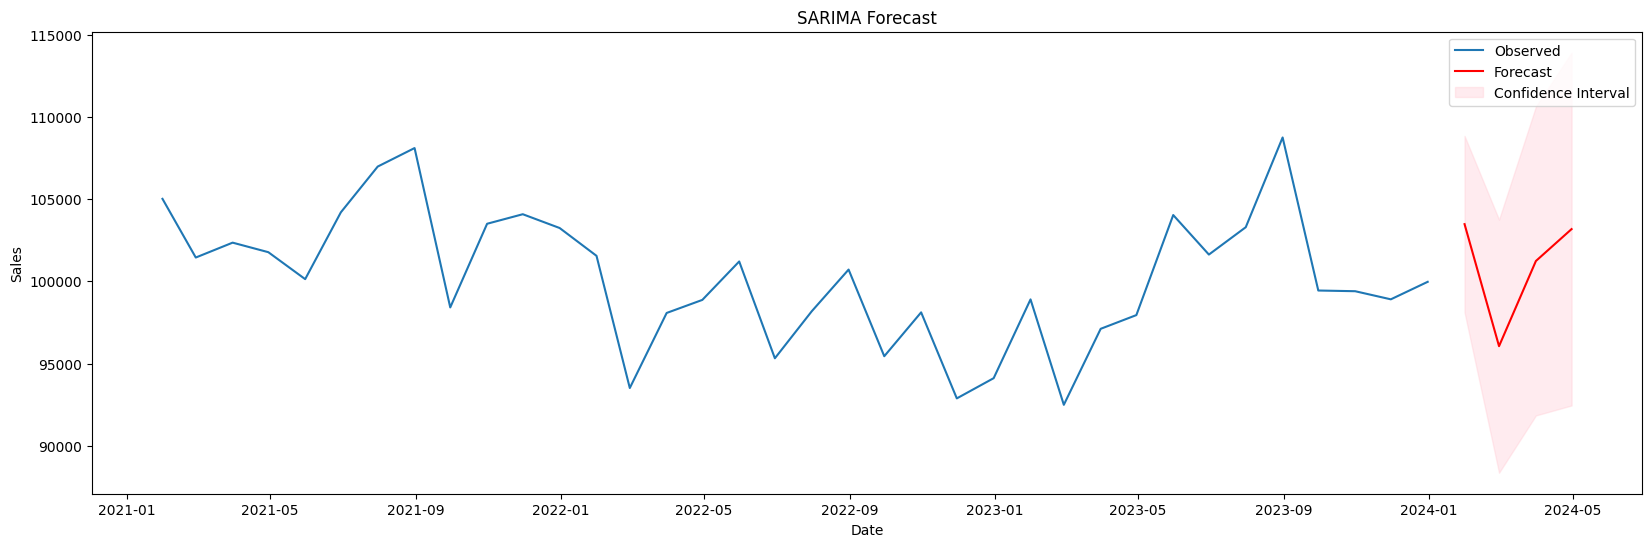

In [90]:

# Train on full data
full_model = SARIMAX(df['Sales'], order=(2, 1, 2), seasonal_order=(0, 1, 1, 12))
full_model_fit = full_model.fit(disp=False)
sarima_forecast = sarima_model_fit.forecast(steps=4)

# Fit the SARIMA model on the full data
full_model = SARIMAX(df['Sales'], order=(2, 1, 2), seasonal_order=(0, 1, 1, 12))
full_model_fit = full_model.fit(disp=False)

# Forecast for the next 4 periods (e.g., months if monthly data)
forecast_steps = 4
sarima_forecast = full_model_fit.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=df.index[-1], periods=forecast_steps + 1, freq='M')[1:]

# Extract the forecasted mean and confidence intervals
forecast_mean = sarima_forecast.predicted_mean
forecast_conf_int = sarima_forecast.conf_int()

# Plot the results
plt.figure(figsize=(20, 6))
plt.plot(df['Sales'], label='Observed')
plt.plot(forecast_index, forecast_mean, label='Forecast', color='red')
plt.fill_between(forecast_index,
                 forecast_conf_int.iloc[:, 0],
                 forecast_conf_int.iloc[:, 1],
                 color='pink', alpha=0.3, label='Confidence Interval')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('SARIMA Forecast')
plt.legend()
plt.show()

In [107]:
# Endemble Model

#Auto ARIMA: 48.15%
#SARIMA: 51.85%

# Weighted ensemble forecast
weights = [0.5185, 0.4815]  # 60% weight to SARIMA and 40% to Auto ARIMA
ensemble_forecast = (weights[0] * sarima_forecast) + (weights[1] * auto_arima_forecast)

In [97]:
sarima_forecast

2023-07-31    102668.453102
2023-08-31    102132.862779
2023-09-30     97382.601188
2023-10-31    103258.174179
Freq: M, Name: predicted_mean, dtype: float64

In [108]:
ensemble_forecast

ensemble_rmse, ensemble_mape = calculate_metrics(test['Sales'], ensemble_forecast)

#print(f'SARIMA RMSE: {sarima_rmse:.2f}, MAPE: {sarima_mape:.2f}%')
print(f'ensemble RMSE: {ensemble_rmse:.2f}, MAPE: {ensemble_mape:.2f}%')

ensemble RMSE: 3156.44, MAPE: 2.08%


In [ ]:
#https://economictimes.indiatimes.com/industry/cons-products/fmcg/big-scope-to-grow-toothpaste-market-colgate-palmolive-india-md-prabha-narasimhan/articleshow/110157056.cms?from=mdr


Proceed
Mean Absolute Error on the test set: 2930.6666666666665


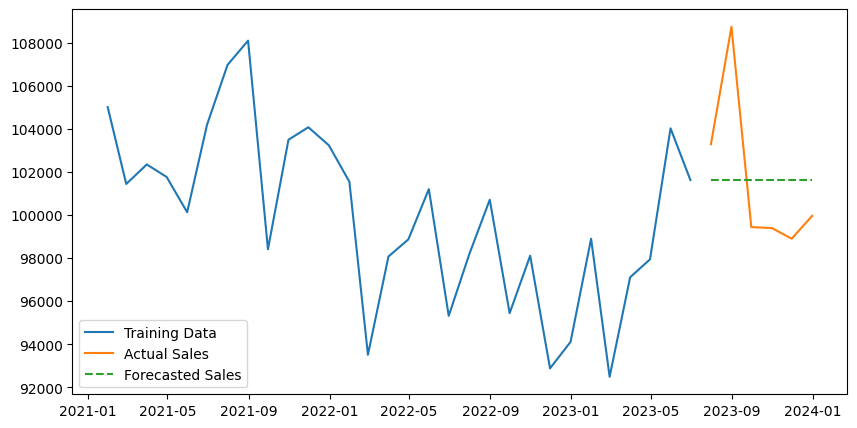

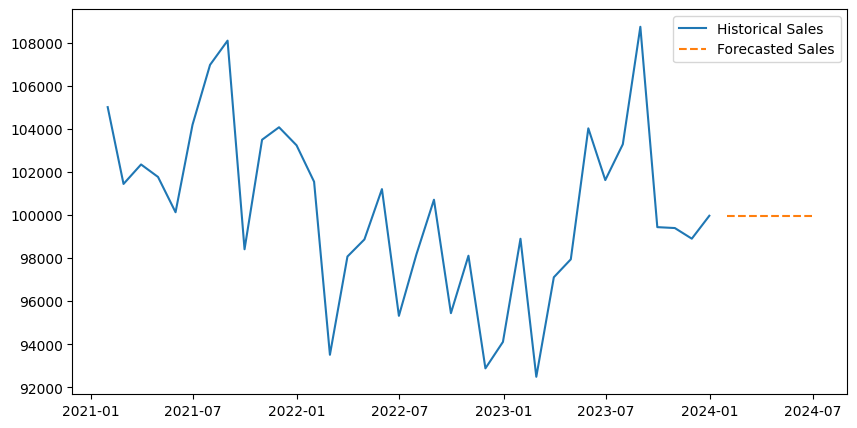

In [105]:
from logging import exception
#Auto Arima
import pandas as pd
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df and has columns 'date' and 'Sales'
# Convert 'date' column to datetime if it's not already
try:
  df['date'] = pd.to_datetime(df['date'])
  # Dropping Percentage Change Column
  df.drop(['Percentage Change'], axis=1, inplace=True)
  df.set_index('date', inplace=True)
except:
  print("Proceed")







# Define the number of points for the test set (last 6 months)
n_test = 6

# Split the data into training and testing sets
train = df.iloc[:-n_test]
test = df.iloc[-n_test:]

# Fit the Auto ARIMA model on the training data
model = auto_arima(train, seasonal=True, stepwise=True, m=  12)

# Forecast for the test set period
forecast_test = model.predict(n_periods=n_test)

# Evaluate the model
mae = mean_absolute_error(test, forecast_test)
print(f'Mean Absolute Error on the test set: {mae}')

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Actual Sales')
plt.plot(test.index, forecast_test, label='Forecasted Sales', linestyle='--')
plt.legend()
plt.show()

# Retrain the model on the entire dataset
model.fit(df)

# Forecast for the next 6 months
forecast_next_6 = model.predict(n_periods=6)

# Create a DataFrame for the forecasted values
forecast_dates = pd.date_range(df.index[-1], periods=7, freq='M')[1:]
forecast_df = pd.DataFrame(forecast_next_6, index=forecast_dates, columns=['Forecast'])

# Plot the forecast
plt.figure(figsize=(10, 5))
plt.plot(df.index, df, label='Historical Sales')
plt.plot(forecast_df.index, forecast_df, label='Forecasted Sales', linestyle='--')
plt.legend()
plt.show()


In [ ]:
#forecast_next_6

# Extract the p, d, q parameters
p = model.order[0]
d = model.order[1]
q = model.order[2]

print(f'Optimal parameters: p={p}, d={d}, q={q}')

In [ ]:
# Read CPI data

cpi_data = pd.read_csv('/content/Economic_Data_Final.csv')

# Extract the relevant date part before the parentheses
# Escape the opening parenthesis with a backslash to treat it literally
cpi_data['Release Date'] = cpi_data['Release Date'].str.split(' \\(').str[0]


# Convert to datetime and then format it to YYYY-MM-DD
cpi_data ['Release Date'] = pd.to_datetime(cpi_data ['Release Date']).dt.strftime('%Y-%m-%d')

# Convert 'Release Date' to datetime objects
cpi_data['Release Date'] = pd.to_datetime(cpi_data['Release Date'])

# Set 'Release Date' to the last day of the month
cpi_data['Release Date'] = cpi_data['Release Date'] + pd.offsets.MonthEnd(0)

cpi_data.head()

In [ ]:

# Rename the 'Release Date' column in cpi_data to 'date' for the join
cpi_data = cpi_data.rename(columns={'Release Date': 'date'})
cpi_data.set_index('date', inplace=True)


# Assuming both df and cpi_data have 'date' as their index
merged_df = df.join(cpi_data, how='inner')
merged_df.drop(['Time'], inplace=True, axis = 1) # Changed 'Drop' to 'drop'

# Remove '%' sign and convert to integers for 'Actual' and 'Forecast' columns
merged_df['Actual'] = merged_df['Actual'].str.rstrip('%').astype(float)
merged_df['Forecast'] = merged_df['Forecast'].str.rstrip('%').astype(float)
merged_df['Previous'] = merged_df['Previous'].str.rstrip('%').astype(float)

merged_df.head()


In [ ]:
cpi_data.head()

In [ ]:
# prompt: write a linear regression code for Sales as dependent variable and Actual as Independent Variable

import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Assuming merged_df is your DataFrame with 'Sales' and 'Actual' columns
X = merged_df['Actual'].values.reshape(-1, 1)  # Reshape for single feature
y = merged_df['Sales'].values

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Print the coefficients
print('Intercept:', model.intercept_)
print('Coefficient (Actual):', model.coef_[0])

# Predict sales based on new CPI values (example)
new_cpi_values = np.array([150, 160, 170]).reshape(-1, 1)
predicted_sales = model.predict(new_cpi_values)
print('Predicted Sales:', predicted_sales)

# Plot the regression line
plt.scatter(X, y, label='Data')
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.xlabel('Actual CPI')
plt.ylabel('Sales')
plt.legend()
plt.show()


In [ ]:
# prompt: from merged_df create a coorelation plot between Sales,	Actual,	Forecast,	Previous columns

import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = merged_df[['Sales', 'Actual', 'Forecast', 'Previous']].corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Plot')
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# Assuming merged_df is your DataFrame with 'Sales' and 'Previous' columns

# Define dependent and independent variables
X = np.log(merged_df['Previous'])
y = np.log(merged_df['Sales'])

# Add a constant to the independent variables matrix (to include an intercept in the model)
#X = sm.add_constant(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fit the model on the training data
model = sm.OLS(y_train, X_train).fit()

# Predict on the test data
y_pred = model.predict(X_test)

# Calculate performance metrics
r_squared = model.rsquared
adjusted_r_squared = model.rsquared_adj
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = mean_absolute_percentage_error(y_test, y_pred) * 100

# Print the performance metrics
print(f'R-squared: {r_squared:.4f}')
print(f'Adjusted R-squared: {adjusted_r_squared:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'MAPE: {mape:.4f}%')

# Retrain the model on the entire dataset
full_model = sm.OLS(y, X).fit()

# Print the model summary
print(full_model.summary())


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

# Assuming merged_df is your DataFrame with 'Sales' and 'Previous' columns

# Define the independent and dependent variables
X = np.log(merged_df[['Previous']]).values  # Independent variable
y = np.log(merged_df['Sales']).values       # Dependent variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create the linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Calculate performance metrics
r_squared = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = mean_absolute_percentage_error(y_test, y_pred) * 100

# Calculate adjusted R-squared
n = len(y_test)  # number of observations
p = X_test.shape[1]  # number of predictors
adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)

# Print the performance metrics
print(f'R-squared: {r_squared:.4f}')
print(f'Adjusted R-squared: {adjusted_r_squared:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'MAPE: {mape:.4f}%')


# Print the model coefficients
print(f'Intercept: {model.intercept_}')
print(f'Coefficient: {model.coef_[0]}')


In [ ]:
# prompt: save merged_df to csv

# Save the DataFrame to a CSV file
merged_df.to_csv('/content/merged_data.csv', index=True)  # Set index=True to include the index in the CSV


In [ ]:
import pandas as pd

# Creating a DataFrame with example data
data = {
    'Month': pd.date_range(start='2021-01-01', end='2023-12-31', freq='M'),
    'Interruption_Flag': [
        0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,  # 2021
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,  # 2022
        1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0   # 2023
    ]
}

# Adjust the flag to account for the next month after a disruption
for i in range(len(data['Interruption_Flag']) - 1):
    if data['Interruption_Flag'][i] == 1:
        data['Interruption_Flag'][i + 1] = 1


df_supply = pd.DataFrame(data)
#print(df_supply)

df_supply.set_index('Month', inplace=True)


# Assuming both df and cpi_data have 'date' as their index
merged_df = merged_df.join(df_supply, how='inner')
merged_df.head()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

# Assuming merged_df is your DataFrame with 'Sales' and 'Previous' columns
merged_df_log = merged_df.copy()
# Define the independent and dependent variables
merged_df_log['Previous'] = np.log(merged_df['Previous'])
merged_df_log['Sales'] = np.log(merged_df['Sales'])

X = merged_df_log[['Previous','Interruption_Flag']]# Independent variable
y = merged_df_log['Sales'].values       # Dependent variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create the linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Calculate performance metrics
r_squared = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = mean_absolute_percentage_error(y_test, y_pred) * 100

# Calculate adjusted R-squared
n = len(y_test)  # number of observations
p = X_test.shape[1]  # number of predictors
adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)

# Print the performance metrics
print(f'R-squared: {r_squared:.4f}')
print(f'Adjusted R-squared: {adjusted_r_squared:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'MAPE: {mape:.4f}%')


# Print the model coefficients
print(f'Intercept: {model.intercept_}')
print(f'Coefficient: {model.coef_[0]}')
print(f'Coefficient: {model.coef_[1]}')



In [ ]:
model.coef_


In [ ]:
import plotly.graph_objs as go
import plotly.io as pio

# Create a Plotly bar chart with data labels
colors = df['Percentage Change'].apply(lambda x: 'red' if x < 0 else 'blue')

fig = go.Figure(data=[
    go.Bar(
        x=df.index,
        y=df['Percentage Change'],
        marker_color=colors,
        name='Percentage Change',
        text=df['Percentage Change'].round(2),  # Data labels rounded to 2 decimal places
        textposition='outside',  # Positioning the labels outside the bars
    )
])

fig.update_layout(
    title='Percentage Change in Total ToothBrush Pieces Sold',
    xaxis_title='Date',
    yaxis_title='Percentage Change (%)',
    xaxis_tickformat='%Y-%m',
    xaxis_tickangle=-45,
    plot_bgcolor='white',
    bargap=0.1,
    yaxis=dict(gridcolor='lightgrey')
)

# Display the plot
fig.show()
